# Checkpoint 1

### Read This First
**1. Use the constants provided in the cell below. Do not use your own constants.**

**2. Put the code that produces the output for a given task in the specific cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc. Additional cells need to be in the proper order such that your code runs the first time through.**

The Coulomb law is given by:

$
\Large
\begin{align}
F(r) = -\frac{e^{2}}{4 \pi \epsilon_{0} r^{2}} \left( \frac{r}{r_{0}} \right)^{\alpha},
\end{align}
$

where $r_{0}$ is the Bhor radius, given by:

$
\Large
\begin{align}
r_{0} = \frac{4 \pi \epsilon_{0} \hbar^{2}}{m e^{2}}.
\end{align}
$

The electric potential is given by:

$
\Large
\begin{align}
V(r) = \int_{r}^{\infty} F(r^{\prime}) dr^{\prime}
\end{align}
$

Use the following constants:
* $\frac{\hbar^{2}}{2m} = 0.0380998\ nm^{2} eV$ (called `c1` below)
* $\frac{e^{2}}{4 \pi \epsilon_{0}} = 1.43996\ nm\ eV$ (called `c2` below)
* $r_{0} = 0.0529177\ nm$ (called `r0` below)
* Planck constant $h = 6.62606896\times10^{-34} J s$ (`h`)
* Speed of light $c = 299792458\ m/s$ (`c`)

In [1]:
# add imports here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as integrate
from scipy.integrate import quad
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
from scipy.optimize import brentq

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

In [3]:
# Constants (use these)
c1 = 0.0380998 # nm^2 eV
c2 = 1.43996 # nm eV
r0 = 0.0529177 # nm
h  = 6.62606896e-34 # J s
c  = 299792458. # m/s
hc = 1239.8419 # eV nm

## Task 1

Write a code that calculates $V(r)$ numerically for $\alpha = 0.01$ and plots it for $r$ = 0.01...1 nm. Remember to label the axes.

In [4]:
def Force(r,a):
    f=-c2/r**2*(r/r0)**a
    return(f)

In [5]:
### TASK 1
def potential_numerical(r, alpha):
    v=quad(Force,r,np.inf,args=(alpha))
    return(v)[0]   

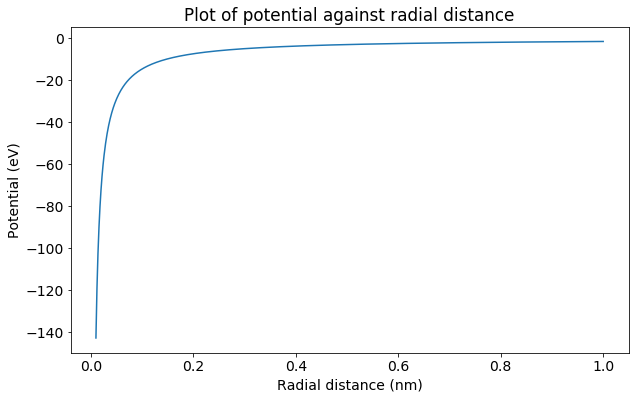

In [6]:
### TASK 1
r=np.linspace(1.0/100,1,1000)

potentialVals = np.zeros_like(r)
for i in range(len(r)):
    temp = potential_numerical(r[i], 0.01)
    potentialVals[i]+= temp

plt.plot(r,potentialVals)
plt.xlabel("Radial distance (nm)")
plt.ylabel("Potential (eV)")
plt.title("Plot of potential against radial distance")
plt.show()

## Task 2

In addition to (1), the test below will compare the analytic expression for $𝑉(r)$ with the numerically obtained values for $r$ = 0.01,0.02...1 nm. The biggest absolute difference $diff = max |V_{exact}(r) − V_{numerical}(r)|$ must be smaller than 10$^{−5}$ eV. There is nothing else for you to do.

In [7]:
def potential_analitical(r,a):
    av= c2*(r/r0)**a/((a-1)*r)
    return(av)

In [8]:
analiticalVals = np.zeros_like(r)
for i in range(len(r)):
    analiticalVals[i]+=potential_analitical(r[i],0.01)
print("The biggest absolute difference between the numerical calculation of the potential and the analitical one is: ", abs(max(potentialVals-analiticalVals)))

The biggest absolute difference between the numerical calculation of the potential and the analitical one is:  1.3419310107565252e-10


In [9]:
# We will call your function for one value of r and alpha = 0.01. There will be more tests!
potential_numerical(0.5, 0.01)

-2.975081858428647

## Task 3

In addition to (2), calculate the first 2 energy levels (eigenvalues of $H$) for $\alpha = 0, 0.01$ and print out the values in eV. The values must be accurate to 0.01 eV. This requires sufficiently large $r_{max}$ and $N$. Plot the difference $\Delta E$ between the two energies for $\alpha = 0, 0.01$. Remember to label the axes.

In [18]:
N = 700
rmax= 1.1
deltar=rmax/N


diagonals = [np.full((N),  -2),
             np.full((N-1), 1),
             np.full((N-1), 1)]


hh = diags(diagonals, [0, -1, 1])
hh = hh/deltar**2

In [19]:
def energy_levels(alpha):
    
    r_range=np.arange(1,N+1)
    
    vmatrix=np.diag(potential_analitical(r_range*deltar,alpha))
    hamiltonian=-c1*hh+vmatrix
    vv, ww = eigs(hamiltonian,sigma=13.6,k=min(40, N-2), which="LM")
    E = np.sort(np.real(vv))
    
    return E[0], E[1]

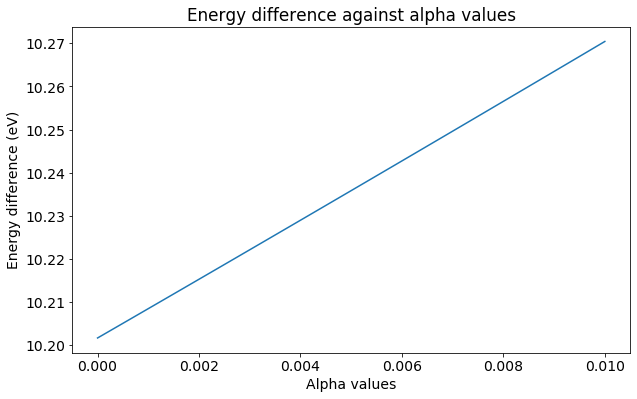

In [20]:
alphavals=np.linspace(0,0.01,100)
diffE=[]
    
for alpha in alphavals:
    E0, E1 = energy_levels(alpha)
    diffE.append(abs(E0-E1))
plt.plot(alphavals,diffE)
plt.xlabel("Alpha values")
plt.ylabel("Energy difference (eV)")
plt.title("Energy difference against alpha values")
plt.show()

In [21]:
# Print out the energy levels for alpha = 0, 0.01.
e_levels_0 = energy_levels(0.0)
e_levels_0_01 = energy_levels(0.01)
print ("alpha = 0.00:", e_levels_0)
print ("alpha = 0.01:", e_levels_0_01)

alpha = 0.00: (-13.602616600831771, -3.4010302256445417)
alpha = 0.01: (-13.804752916919059, -3.5342998033762694)


## Task 4

In addition to (3), assuming that the transition between the 1st excited and the ground state corresponds to the wavelength $\lambda = 121.5 \pm 0.1$ nm, what is the maximum value of $\alpha_{max} > 0$ consistent with this measurement (i.e., the largest $\alpha_{max} > 0$ such that the predicted and measured wavelengths differ by less than 0.1 nm)?

In [22]:
def root1(alpha):
    
    E0, E1 = energy_levels(alpha)
    deltaE = E1 - E0
    return((hc/deltaE) - 121.4)

def find_alpha_max():
    alpha_max=brentq(root1, 0, 0.01)
    return alpha_max


In [23]:
# Run the function and print alpha_max.
alpha_max = find_alpha_max()
print ("alpha_max:", alpha_max)

alpha_max: 0.0016544719328677353


## Task 5

Improve the accuracy of the computation of the two energy levels to 0.001 eV and find $\alpha_{max}$ assuming the wavelength $\lambda = 121.503 \pm 0.01$ nm.

In [25]:
### TASK 5
N2 =3000
rmax2=1.25
deltar2=rmax2/N2


diagonals2 = [np.full((N2),  -2),
             np.full((N2-1), 1),
             np.full((N2-1), 1)]


hh2 = diags(diagonals2, [0, -1, 1])
hh2 = hh2/deltar2**2
    
def energy_levels_improved(alpha):
    
    r_range=np.arange(1,N2+1)
    
    vmatrix2=np.diag(potential_analitical(r_range*deltar2,alpha))
    hamiltonian=-c1*hh2+vmatrix2
    vv, ww = eigs(hamiltonian,sigma=-13.6, k=min(100, N2-2), which="LM")
    E = np.sort(np.real(vv))
    
    return E[0], E[1]

def root(alpha):
    
    E0, E1 = energy_levels_improved(alpha)
    deltaE = E1 - E0
    return((hc/deltaE) - 121.493)

def find_alpha_max_improved():
    alpha_max=brentq(root, 0, 0.01)
    return alpha_max


In [27]:
# Run the function and print alpha_max.
e_levels_0_01 = energy_levels_improved(0.01)
print ("alpha = 0.01:", e_levels_0_01)
# Run the function and print alpha_max.
alpha_max_improved = find_alpha_max_improved()
print ("alpha_max:", alpha_max_improved)

alpha = 0.01: (-13.807217221122329, -3.5345778562376022)
alpha_max: 0.00014974372339278597


## Task 6

How would one achieve the same accuracy with significantly smaller matrices? Hint: can we represent $R$ from Eq. (1) as a linear combination of functions that solve the "unperturbed" equation, and translate this into an eigenproblem for a certain $N \times N$ matrix, with $N < 100$?

In [ ]:
### TASK 6



In [ ]:
# Run the function and print alpha_max.
e_levels_0_01 = energy_levels_best(0.01)
print ("alpha = 0.01:", e_levels_0_01)
# Run the function and print alpha_max.
alpha_max_best = find_alpha_max_best()
print ("alpha_max:", alpha_max_best)